# Fundamentals of Machine Learning

## Machine learning classification tasks

Importing modules

In [1]:
import numpy as np #linear algebra
import pandas as pd #dataframes
import sklearn.preprocessing #raw data preprocessing
import sklearn.model_selection #grid search + cross validation
import sklearn.ensemble #random forest
import sklearn.tree #decision trees
import sklearn.linear_model #logistic regression + perceptron
import sklearn.svm #support vector machines
import sklearn.neighbors #k-nearest neighbors
import sklearn.neural_network #multilayer perceptron
import matplotlib.pyplot as plt #visualization
import xgboost as xgb #extreme gradient boosting

Reading the data from a csv file and saving it into a dataframe

In [2]:
data = pd.read_csv('exampleObesityClassReg.csv')

### Data Preprocessing

Data exploration

In [3]:
data.sample(10)

,country_name,continent,prevalence,tertile,RTDs/High-Strength Premixes,Processed Fruit and Vegetables,Processed Meat and Seafood,Ready Meals,"Rice, Pasta and Noodles","Sauces, Dressings and Condiments",...,Baby Food,Drinking Milk Products,Yoghurt and Sour Milk Products,Other Dairy,Ice Cream and Frozen Desserts,Cocoa Powder,Emulsifiers and Co-Emulsifiers,Fats and Oils,Flours,Milk
55,Spain,Europe,0.238788,3,1059.766667,22400.933330,19507.166670,7940.333333,10296.900000,10982.000000,...,2468.533333,100433.766700,17605.966670,7247.466667,6880.866667,575.666667,508.600000,29654.266670,44410.633330,125719.66670
22,Uzbekistan,Asia,0.168876,1,0.000000,1652.666667,757.233333,0.000000,3542.200000,512.266667,...,159.066667,5712.033333,6389.333333,1623.800000,1247.600000,39.200000,45.533333,9695.100000,24425.466670,12996.46667
2,Japan,Asia,0.044837,1,4773.366667,7882.000000,31266.500000,11406.533330,51489.866670,28564.600000,...,366.500000,33589.800000,9963.800000,1775.833333,5336.266667,259.100000,273.933333,14994.766670,26887.766670,47567.50000
49,Belarus,Europe,0.231179,2,3064.433333,4225.466667,14961.966670,2382.166667,8495.133333,4130.700000,...,1437.633333,44447.966670,21490.166670,19663.466670,2739.866667,206.500000,406.433333,24819.966670,30754.366670,82030.06667
66,Slovenia,Europe,0.263871,3,2454.966667,7337.333333,11419.266670,2031.900000,10990.766670,6365.633333,...,1059.166667,75184.000000,13103.766670,7001.166667,3239.900000,228.366667,353.100000,17559.200000,45317.533330,99504.33333
5,China,Asia,0.054962,1,13.500000,489.533333,2108.066667,372.500000,7443.766667,5789.666667,...,225.633333,9707.733333,1889.800000,48.933333,2173.500000,77.466667,33.600000,5639.366667,6677.033333,10232.66667
62,Ireland,Europe,0.245770,3,2224.766667,24923.633330,14496.366670,6819.933333,7718.466667,9482.600000,...,1468.500000,145484.466700,12243.000000,5275.966667,5881.433333,334.233333,661.466667,22925.833330,45092.700000,166411.83330
69,Chile,America,0.289636,3,431.266667,9581.966667,6937.666667,383.466667,17394.666670,6575.500000,...,591.833333,20579.700000,8320.166667,5449.900000,5682.866667,276.866667,483.300000,20101.933330,69019.100000,37038.30000
71,Argentina,America,0.291443,3,244.133333,6191.133333,7668.366667,107.366667,14493.133330,7684.366667,...,770.033333,37293.833330,9990.833333,4294.766667,1868.066667,325.600000,402.200000,16529.066670,53816.066670,60104.70000
75,South Africa,Africa,0.334897,3,3278.166667,5927.266667,3512.933333,460.233333,15566.800000,2433.666667,...,657.400000,26272.733330,3927.466667,1856.400000,1326.533333,55.233333,247.066667,15623.166670,18530.433330,32373.90000


Checking if the dataset is balanced

In [4]:
data.tertile.value_counts()

3    28
1    26
2    25
Name: tertile, dtype: int64

In [5]:
##########

# what if the dataset is unbalanced?, describe the problems that can generate a training session whith unbalanced data
# and code the solution to balance the data

# HINT:
# count_class_0, count_class_1 = dataframe['label'].value_counts() # class 0 is the predominant
# df_class_0 = dataframe[dataframe['label'] == 0]
# df_class_1 = dataframe[dataframe['label'] == 1]
# df_class_0_under = df_class_0.sample(count_class_1)
# dataframe_balanced = pd.concat([df_class_0_under, df_class_1], axis=0)

##########

Describing the shape of the dataframe

In [6]:
data.shape

(79, 52)

Creating a variable which only contains the predictor features

In [7]:
features = data[data.columns.difference(['prevalence','tertile','country_name'])]

Saving the feature names into a variable

In [8]:
feature_names = features.columns

If one would like to consider continents the way to do it is by encoding the categorical features into dummy variables like (in R one can use "as.factor"):
* continent_Asia
* continent_Europe
* ...

In [9]:
pd.get_dummies(features)

,Baby Food,Baked Goods,Beer,Bottled Water,Breakfast Cereals,Butter and Margarine,Carbonates,Cheese,Chocolate Confectionery,Cocoa Powder,...,"Sweet Biscuits, Snack Bars and Fruit Snacks",Tea,Vegetables,Wine,Yoghurt and Sour Milk Products,continent_Africa,continent_America,continent_Asia,continent_Europe,continent_Oceania
0,437.633333,1577.100000,17720.400000,3904.233333,1.833333,61.200000,4723.566667,32.266667,38.100000,31.100000,...,516.533333,167.700000,113147.633300,289.7333,985.366667,0,0,1,0,0
1,39.433333,2109.400000,1009.966667,1536.300000,7.400000,488.200000,1706.566667,43.366667,41.333333,13.000000,...,867.666667,285.200000,68016.633330,7.5333,263.700000,0,0,1,0,0
2,366.500000,22090.566670,50449.366670,22010.033330,233.766667,1129.566667,28788.466670,1700.966667,1127.500000,259.100000,...,2149.366667,954.033333,100732.666700,7246.0333,9963.800000,0,0,1,0,0
3,52.933333,3054.500000,11499.100000,5467.833333,174.033333,8216.500000,7951.100000,6.566667,43.166667,10.300000,...,251.266667,509.633333,5028.533333,453.4000,512.733333,1,0,0,0,0
4,644.566667,3154.500000,632.466667,48291.766670,19.066667,197.433333,2537.766667,50.700000,246.466667,79.166667,...,797.366667,335.033333,39025.733330,80.5000,276.300000,0,0,1,0,0
5,225.633333,3744.900000,28878.933330,12520.366670,64.233333,21.000000,7683.766667,12.033333,60.000000,77.466667,...,1079.733333,233.800000,141560.133300,1868.4667,1889.800000,0,0,1,0,0
6,76.700000,2417.566667,44.233333,1293.233333,10.366667,484.500000,4253.500000,27.366667,45.800000,12.166667,...,845.233333,1287.300000,72780.133330,0.0000,8.333333,0,0,1,0,0
7,1150.800000,18112.600000,18441.866670,15262.166670,707.033333,1159.500000,28420.800000,1395.600000,970.633333,280.533333,...,2830.600000,347.600000,88776.166670,1468.6333,2841.200000,0,0,1,0,0
8,593.266667,3412.366667,15565.300000,40542.700000,141.633333,808.300000,32445.300000,570.466667,258.266667,67.300000,...,712.200000,25.700000,54906.133330,105.6000,528.166667,0,0,1,0,0
9,160.766667,3433.466667,7604.933333,90111.066670,224.633333,129.733333,6796.266667,0.766667,6.766667,44.033333,...,414.666667,19.533333,45772.300000,154.9000,314.800000,1,0,0,0,0


But does it have sense to use the continents as predictor? Let's use only food as predictors. 

In [10]:
features = features[features.columns.difference(['continent'])]

In [11]:
features.sample(3)

,Baby Food,Baked Goods,Beer,Bottled Water,Breakfast Cereals,Butter and Margarine,Carbonates,Cheese,Chocolate Confectionery,Cocoa Powder,...,Sports and Energy Drinks,Spreads,Starchy Roots,Sugar Confectionery,Sugar and Sweeteners,"Sweet Biscuits, Snack Bars and Fruit Snacks",Tea,Vegetables,Wine,Yoghurt and Sour Milk Products
6,76.7,2417.566667,44.233333,1293.233333,10.366667,484.50000,4253.50000,27.366667,45.800000,12.166667,...,1.266667,20.133333,19497.66667,181.033333,26243.43333,845.233333,1287.300000,72780.13333,0.0000,8.333333
7,1150.8,18112.600000,18441.866670,15262.166670,707.033333,1159.50000,28420.80000,1395.600000,970.633333,280.533333,...,5568.433333,1147.466667,14040.40000,884.133333,15196.96667,2830.600000,347.600000,88776.16667,1468.6333,2841.200000
33,3898.5,60254.633330,90879.466670,19411.766670,4731.733333,13190.66667,64486.33333,15202.966670,5613.833333,428.833333,...,3626.966667,1968.266667,54839.50000,5336.900000,4414.30000,5347.966667,231.233333,54826.60000,12089.6667,40846.666670


Creating a variable of the categorical labels of the dataset

In [12]:
labels_categorical = data.tertile

Normalizing the numerical variables into a min max scaler where the maximum value is transformed into a 1 and the minimum value is 0

In [13]:
minMaxScaler = sklearn.preprocessing.MinMaxScaler()
features = minMaxScaler.fit_transform(features)

In [14]:
features[:1,:]

array([[1.03185572e-01, 1.33818127e-03, 1.09283215e-01, 1.49233599e-02,
        0.00000000e+00, 3.05246906e-03, 1.69307795e-02, 1.84287043e-03,
        3.35912234e-03, 3.22430631e-02, 6.25161770e-02, 1.95383271e-04,
        2.40807285e-02, 1.34124650e-01, 8.86528758e-02, 1.42828672e-03,
        9.25111471e-02, 2.12577881e-01, 1.51973811e-02, 3.83042097e-01,
        1.02277989e-01, 1.04349473e-02, 8.94231364e-03, 3.92787984e-01,
        2.35873654e-02, 8.23362026e-01, 4.57720111e-02, 1.29546406e-02,
        1.79410705e-03, 1.01928756e-02, 1.15803603e-01, 0.00000000e+00,
        3.52686069e-03, 5.51678163e-02, 1.21884279e-01, 3.08558548e-02,
        0.00000000e+00, 8.63255982e-03, 8.28225925e-02, 0.00000000e+00,
        3.55299793e-01, 5.99909253e-02, 1.22368333e-01, 3.11179893e-02,
        5.75844010e-02, 6.57770121e-01, 6.06134921e-03, 2.39244174e-02]])

Splitting the data into training and testing subsets

In [15]:
features_train, features_test, labels_categorical_train, labels_categorical_test = sklearn.model_selection.train_test_split(
    features,
    labels_categorical,
    test_size=0.30,
    random_state = 55,
    stratify = labels_categorical #preserving the probability distribution of the original dataset
)

In [16]:
features_train

array([[0.06784888, 0.13464565, 0.24193552, ..., 0.21099395, 0.00564294,
        0.0741599 ],
       [1.        , 0.3108829 , 0.56159045, ..., 0.30295924, 0.25292119,
        1.        ],
       [0.11118405, 0.43893647, 0.20544053, ..., 0.32127722, 0.22246591,
        0.34581888],
       ...,
       [0.07729848, 0.29908984, 0.03654074, ..., 0.40806503, 0.01911013,
        0.17739624],
       [0.5806499 , 0.3901973 , 0.24696995, ..., 0.65744261, 0.68046812,
        0.29498102],
       [0.26947794, 0.3929943 , 0.53192116, ..., 0.67795643, 0.12884204,
        0.2518965 ]])

Training a single decision tree with a max depth of 2

### Machine Learning Data Analysis

#### Single Decision tree

In [17]:
decisionTree = sklearn.tree.DecisionTreeClassifier(max_features=None, max_depth=2)
decisionTree.fit(features_train,labels_categorical_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Plotting the decision tree

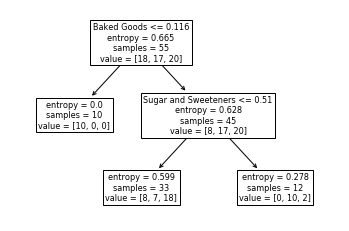

In [18]:
ax = sklearn.tree.plot_tree(decisionTree,
                       feature_names = feature_names
                      )
plt.show()

Training a single decision tree with a without specifying the maximum depth

In [19]:
decisionTree_full = sklearn.tree.DecisionTreeClassifier(max_features=None)
decisionTree_full.fit(features_train,labels_categorical_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Plotting the tree

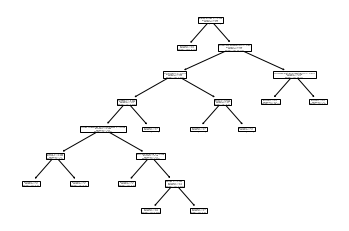

In [20]:
ax = sklearn.tree.plot_tree(decisionTree_full,
                       feature_names = feature_names
                      )
plt.savefig('tree.pdf') #saving the tree plot as pdf
plt.show()

### Ensemble of Trees

Training a random forest classifier with 100 trees

In [21]:
classifier = sklearn.ensemble.RandomForestClassifier(n_estimators=100, random_state=15)

In [22]:
classifier.fit(features_train,labels_categorical_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=15, verbose=0,
                       warm_start=False)

Predicting the labels from the test features subset

In [23]:
predictions = classifier.predict(features_test)

Printing the confusion matrix between the true and predicted values

In [24]:
print(sklearn.metrics.confusion_matrix(predictions, labels_categorical_test))

[[8 3 0]
 [0 3 3]
 [0 2 5]]


Extracting some performance metrics from the prediction

In [25]:
print(sklearn.metrics.classification_report(predictions, labels_categorical_test))

              precision    recall  f1-score   support

           1       1.00      0.73      0.84        11
           2       0.38      0.50      0.43         6
           3       0.62      0.71      0.67         7

    accuracy                           0.67        24
   macro avg       0.67      0.65      0.65        24
weighted avg       0.73      0.67      0.69        24



Extracting the variable importance list from the random forest classifier

In [26]:
vil = pd.DataFrame(list(zip(feature_names,classifier.feature_importances_)),
                   columns=['feature','mean_gini_decrease']
                  ).sort_values(by='mean_gini_decrease', ascending=False)

In [27]:
vil.head()

,feature,mean_gini_decrease
7,Cheese,0.063591
1,Baked Goods,0.043548
42,Sugar and Sweeteners,0.042914
40,Starchy Roots,0.039150
17,Fish and Seafood,0.038324


Plotting the variable importance list sorted by the mean decrease gini

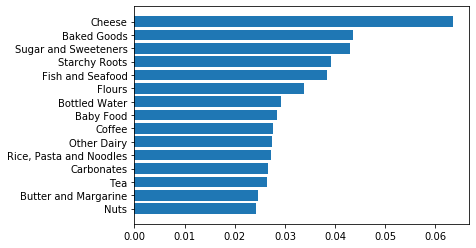

In [28]:
ax = plt.barh(data = vil.sort_values(by='mean_gini_decrease').tail(15), 
         y='feature', 
         width = 'mean_gini_decrease'
        )
plt.show()

Averaging the VIL from 50 random forest runs

In [29]:
rf_vil  = []
for i in range(50):
    rf = sklearn.ensemble.RandomForestClassifier(n_estimators=100)
    rf = rf.fit(features_train,labels_categorical_train)
    rf_vil.append(rf.feature_importances_)
mean_vil = np.mean(rf_vil, axis = 0)

In [30]:
mean_vil = pd.DataFrame(list(zip(feature_names,mean_vil)),
                   columns=['feature','mean_gini_decrease']
                  ).sort_values(by='mean_gini_decrease', ascending=False)

In [31]:
mean_vil.head()

,feature,mean_gini_decrease
7,Cheese,0.048952
1,Baked Goods,0.044972
42,Sugar and Sweeteners,0.043816
17,Fish and Seafood,0.040285
44,Tea,0.034903


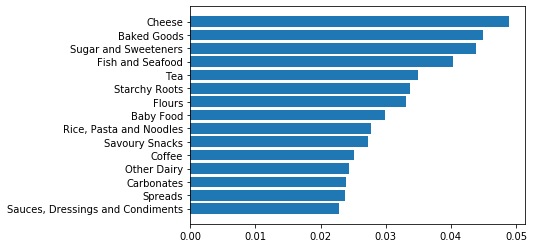

In [32]:
ax = plt.barh(data = mean_vil.sort_values(by='mean_gini_decrease').tail(15), 
         y='feature', 
         width = 'mean_gini_decrease'
        )
plt.show()

### Comparison Between Diferent Machine Learning Models and Hyperparameters

Selecting some machine learning training algorithms, training each one and using cross validation to retrieve their performance

In [42]:
models = []

models.append(("LogisticRegression",sklearn.linear_model.LogisticRegression()))
models.append(("SVC",sklearn.svm.SVC()))
models.append(("RandomForest",sklearn.ensemble.RandomForestClassifier()))
models.append(("KNeighbors",sklearn.neighbors.KNeighborsClassifier()))
models.append(("MLPClassifier",sklearn.neural_network.MLPClassifier()))
models.append(("XGBoost",xgb.XGBClassifier()))
models.append(("DecisionTree",sklearn.tree.DecisionTreeClassifier()))


results = []
names = []
for name,model in models:
    result = sklearn.model_selection.cross_val_score(model, 
                             features, 
                             labels_categorical,  
                             cv=10, 
                             scoring='accuracy',
                             n_jobs=-1
                            )
    names.append(name)
    results.append(result)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solv

/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default 

/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/ana

List of compared models along with their hyperparameters

In [43]:
models

[('LogisticRegression',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     multi_class='warn', n_jobs=None, penalty='l2',
                     random_state=None, solver='warn', tol=0.0001, verbose=0,
                     warm_start=False)),
 ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
      kernel='rbf', max_iter=-1, probability=False, random_state=None,
      shrinking=True, tol=0.001, verbose=False)),
 ('RandomForest',
  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                         max_depth=None, max_features='auto', max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, n_e

Box plot of the results of each model

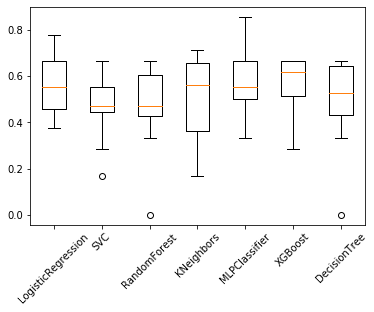

In [44]:
plt.boxplot(results,labels = names)
plt.xticks(rotation=45)
plt.show()

In [45]:
##########

#compare the models based on their f1-score, what is the problem?

##########

Grid search for selection of the best hyperparameters

In [46]:
# HIGH PROCESSOR INTENSIVE TASK (~5 minutes calculations of a 12 cores machine)

# parameters = {'n_estimators': list(range(260,360,20)),
#               'max_features': ['auto', 'sqrt'],
#               'max_depth': list(range(20,100,20))+[None],
#               'min_samples_split': [2, 5, 10],
#               'min_samples_leaf': [1, 2, 4],
#               'bootstrap': [True, False]
# }
# grid_Search = sklearn.model_selection.GridSearchCV(sklearn.ensemble.RandomForestClassifier(), 
#                                                    parameters, 
#                                                    n_jobs=-1,
#                                                    cv = 3
#                                                   )

# grid_Search.fit(features_train,labels_categorical_train)

In [47]:
#low intensive grid search
parameters = {'n_estimators': [100,150,200]
}
grid_Search = sklearn.model_selection.GridSearchCV(sklearn.ensemble.RandomForestClassifier(), 
                                                   parameters, 
                                                   n_jobs=-1,
                                                   cv = 3
                                                  )

grid_Search.fit(features_train,labels_categorical_train)

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_j

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [49]:
grid_Search.best_params_

{'n_estimators': 150}

In [50]:
pd.DataFrame(grid_Search.cv_results_).head(10)

,mean_fit_time,mean_score_time,mean_test_score,param_n_estimators,params,rank_test_score,split0_test_score,split1_test_score,split2_test_score,std_fit_time,std_score_time,std_test_score
0,0.130158,0.040569,0.545455,100,{'n_estimators': 100},2,0.473684,0.684211,0.470588,0.006536,0.013086,0.100812
1,0.226269,0.026807,0.563636,150,{'n_estimators': 150},1,0.473684,0.736842,0.470588,0.018001,0.004100,0.125837
2,0.246825,0.017069,0.545455,200,{'n_estimators': 200},2,0.526316,0.631579,0.470588,0.028982,0.002576,0.066493


One can apply predict to gridSearch and automatically calculates the given model with the best hyper-parameters. 

In [57]:
predictions = grid_Search.predict(features_test)

In [58]:
print(sklearn.metrics.confusion_matrix(predictions, labels_categorical_test))

[[7 2 0]
 [1 4 3]
 [0 2 5]]


In [59]:
print(sklearn.metrics.classification_report(predictions, labels_categorical_test))

              precision    recall  f1-score   support

           1       0.88      0.78      0.82         9
           2       0.50      0.50      0.50         8
           3       0.62      0.71      0.67         7

    accuracy                           0.67        24
   macro avg       0.67      0.66      0.66        24
weighted avg       0.68      0.67      0.67        24



In [60]:
##########

#make your own grid search for other training algorithm

##########